# Introduction to Data Science

## Due Date: November, 11

**Instructions**:

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Then you can safely delete the line

  `raise NotImplementedError()`

- Please fill out the cell below for **every submission**.
- Before you hand this problem, make sure everything runs as expected. You can use the `Validate` button directly above the cells or **restart the kernel and run all cells** by selecting `Kernel --> Restart Kernel and Run All Cells` in the menubar above.
- Don't forget to submit the file until the due date by clicking on `Nbgrader --> Assignment List` and then clicking on `Submit`.
- You can savely add new cells to make additional experiments, but please use the given cells to solve the problems and answer the tasks. Otherwise, the autograder might not be able to grade your answer appropriately and assign the correct number of points.

In [1]:
NAME = "Sebastian Schulz"
USERNAME = "schulzs"

---

# Introduction to Data Science
## Lab 4: Further aspects of linear regression

### Part A - Limitations of the t-test

In this notebook, we investigate the limitations of a single-variable **t-test** for the predictor coefficients $\beta$ in a linear regression setting.
Recall the following statements from the lecture:
* Does a single small $p$-value indicate at least one variable relevant? No.
* Example: $p=100$, $H_0 : \beta_1 = \dots = \beta_p = 0$ true. Then by chance, $5\%$ of $p$-values below $0.05$. Almost guaranteed that $p<0.05$ for at least one variable by chance.
* Thus, for large $p$, looking only at $p$-values of individual $t$-statistics tends to discover spurious relationships.

In what follows, we use slightly different values than in the above mentioned example, setting $n = 100$ and $p = 20$.

In [2]:
import numpy as np

# Set parameters n (number of training samples) and p (number of predictor variables)
n = 100
p = 20

For this purpose, we generate random uncorrelated input and output vectors.

**Task**: Write the function `drawSample` that generates **uniformly distributed** arrays of random variables
* $X$ should be of size `(n, p+1)` with values in $[0,1)$; the first column is reserved for the intercept and should contain only ones
* $y$ should be of size `(n,)` with values in $[-0.5,0.5)$

In [3]:
import numpy as np

def drawSample(n,p):
    """ This function draws a
    sample for our experiment. """
    
    X = np.ndarray(shape=(n, p+1))
    X[:, 0] = np.ones(n)
    X[:, 1:] = np.random.uniform(0, 1, (n, p))

    y = np.random.uniform(-0.5, 0.5, (n,))

    return (X,y)

In [4]:
assert drawSample(40,4)[0].shape == (40,5), 'Wrong shape of X'
assert drawSample(40,4)[1].shape == (40,), 'Wrong shape of y'
# This cell contains hidden tests. Don't remove it!

The following function computes single-variable t-statistics for the model
$$ y \approx X \beta $$
whose parameters $\beta \in \mathbb{R}^{p+1}$ are estimated via
$$ \hat \beta = (X^\top X)^{-1} X^\top y. $$

**Task:** Extend the function `printTStatistic`. It should **return the proportion of significant predictor variables** at a certain threshold `p_threshold`. 

In [5]:
from scipy.stats import t

def printTStatistic(X, y, p_threshold = 0.10, print_table=True):
    n, m = X.shape
    p = m - 1

    # Invert X^T * X
    V = np.linalg.inv((X.T).dot(X))
    

    # Compute regression coefficients beta
    beta = V.dot( X.T.dot(y) )

    # Extract diagonal of matrix (X^T * X)^-1
    v = V.diagonal()

    # Predict y using beta
    y_pred = X.dot(beta)

    # Compute estimate of sigma
    sigma_hat = np.sqrt( 1./(n-p-1) * np.power(y - y_pred,2).sum() )

    # Compute the standard errors
    SE = np.sqrt(v) * sigma_hat

    # Compute the values of the t-statistic
    t_vals = beta / SE

    # Compute the corresponding p values
    p_vals = 2*t.cdf(-np.absolute(t_vals), n-p-1)

    if print_table:
        
        # Print header
        print(f'|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < {p_threshold:4.2f} |')
        print('----------------------------------------------------------------------------')
        
        # Print 
        for i in range(p+1):
            p_val = p_vals[i]
            if p_val < 0.0001:
                p_val_str = '< 0.0001'
            else:
                p_val_str = f'  {p_val:5.4f}'
            print(f'|    beta_{i:02d}    |  {beta[i]:6.3f}  |  {SE[i]:6.4f}  |    {t_vals[i]:5.2f}    | {p_val_str:s}  |     {p_val < p_threshold:d}    |')
    
    # YOUR CODE HERE
    return np.shape(p_vals[p_vals < p_threshold])[0] / np.shape(p_vals)[0]

Now, we want to find out, how many predictor variables are statistically significant for a threshold of $0.10$ in our setting with `n = 100` and `p = 20`.

**Task**: Test the function `printTStatistic` using an example drawn with your function `drawSample`. Execute the cell multiple times (by hitting `Ctrl + Enter`).

In [6]:
X, y = drawSample(100, 20)
printTStatistic(X, y)

|  Coefficient  | Estimate |    SE    | t-statistic |  p-value  | p < 0.10 |
----------------------------------------------------------------------------
|    beta_00    |   0.191  |  0.2599  |     0.73    |   0.4646  |     0    |
|    beta_01    |  -0.060  |  0.1086  |    -0.55    |   0.5817  |     0    |
|    beta_02    |   0.089  |  0.1104  |     0.80    |   0.4247  |     0    |
|    beta_03    |   0.137  |  0.1284  |     1.07    |   0.2891  |     0    |
|    beta_04    |  -0.069  |  0.1173  |    -0.59    |   0.5568  |     0    |
|    beta_05    |   0.069  |  0.1124  |     0.61    |   0.5409  |     0    |
|    beta_06    |  -0.037  |  0.1178  |    -0.32    |   0.7519  |     0    |
|    beta_07    |  -0.140  |  0.1132  |    -1.24    |   0.2187  |     0    |
|    beta_08    |   0.073  |  0.1118  |     0.66    |   0.5128  |     0    |
|    beta_09    |  -0.185  |  0.1136  |    -1.63    |   0.1074  |     0    |
|    beta_10    |   0.143  |  0.1241  |     1.16    |   0.2512  |     0    |

0.14285714285714285

**Task**: Write a small script that carries out the experiment `1000` times and computes the **mean proportion of significant values** in our experiment. It should be around `p_threshold`.

**Hint 1**: Use the keyword argument `print_table` of the function `printTStatistic` to suppress the printing of the tables.

**Hint 2**: You can collect the returned values in a list initialized by `vals = []`. You can append a new value `new_val` using `vals.append(new_val)`. You can also use a `numpy.array` initialized with proper size instead.

In [7]:
iterations = 1000
p_propotions = np.zeros(iterations)

for i in range(iterations):
    X, y = drawSample(100, 20)
    p_propotions[i] = printTStatistic(X, y, print_table=False)

print(np.mean(p_propotions))

0.09814285714285714


### Part B: Polynomial regression

The goal of this problem is to approximate given data points $(x_i,y_i)$ for $i=1,\ldots,n$ by polynomials of degree $p$.
This can be done by solving the **linear regression problem**:

$$
 y_i \approx \beta_0 + \beta_1 \, x_i + \beta_2 \, x_i^2 + \ldots + \beta_p \, x_i^p
$$

By splitting our data into a training and test data set, we want to graphically illustrate the **problem of overfitting**.

**Task**: Define the 'unknown' function

$$
f(x) = \sin(10 \, x) + 5 \, \cos(3 \, x)
$$

using `numpy`.

In [8]:
import numpy as np

f = lambda x: np.sin(10*x) + 5 * np.cos(3*x)

In [9]:
assert(np.abs(f(np.pi)+5) < 1e-8)
assert(np.abs(f(np.pi/2)) < 1e-8)
# This cell contains hidden tests. Don't remove it!

**Task**: Generate a uniformly distributed random vector `x` of size `n = 200`.

In [10]:
# Set random seed to make random variables 'predictable'
np.random.seed(0)
n = 200
x = np.random.uniform(0, 1, n)

In [11]:
assert n == 200
assert x.shape == (200,)
# This cell contains hidden tests. Don't remove it!

**Task**: Generate a standard-normally distributed random vector `eta` of size `n`.
Determine the vector `y` in the following way

$$
y_i = f(x_i) + \varepsilon \, \eta_i
$$

with $\varepsilon = 1$.

In [12]:
# YOUR CODE HERE
eta = np.random.normal(loc=0, scale=1, size=(200))
epsilon = 1
y = f(x) + eta * epsilon

In [13]:
assert y.shape == (200,)
# This cell contains hidden tests. Don't remove it!

**Task**: Generate one figure with the following data:
* mark the **data points** $(x_i,y_i)$ as black circles
* draw the **population line** (the line representing the *unknown* function $f$) as a red solid line
* draw the **regression line** for a fitted polynomial with polynomial degree `p = 20` as a blue dashed line
* add a legend to your plot with proper labels

**Hint**: You can use the function `np.polynomial.Polynomial.fit()` to determine a regression model. This regression model contains a method `linspace()` which can be used to plot a regression line.

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_35407/2704241119.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(xhat, yhat, marker='None', linestyle='--', color='blue', label='regression line $\hat{f}_{p=20}(x)$')


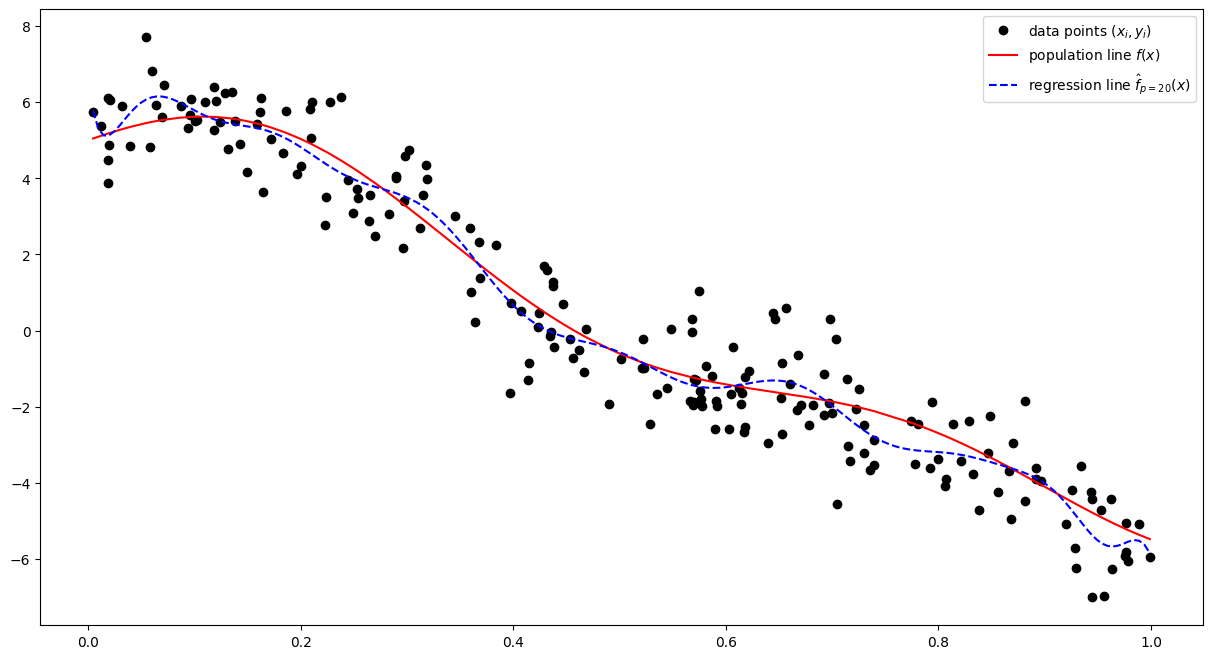

In [14]:
import matplotlib.pyplot as plt
from numpy import polynomial

plt.rcParams['figure.figsize'] = (15,8)

x_sorted = np.sort(x)
fhat = polynomial.Polynomial.fit(x, y, deg=20)
xhat, yhat = fhat.linspace(np.shape(x)[0])

fig = plt.figure(1, clear = True)
plt.plot(x, y, marker='o', color='black', linestyle='None', label='data points $(x_i, y_i)$')
plt.plot(x_sorted, f(x_sorted), marker='None', linestyle='-', color='red', label='population line $f(x)$')
plt.plot(xhat, yhat, marker='None', linestyle='--', color='blue', label='regression line $\hat{f}_{p=20}(x)$')
plt.legend()

**Task**: Split the dataset $(x,y)$ into a training and test set using `np.split`
- the training set should contain `ntrain` samples
- the test set should contain `n - ntrain` samples

Choose `ntrain = 80`.

In [15]:
# YOUR CODE HERE
ntrain = 80
xtrain, xtest = np.split(x, [ntrain])
ytrain, ytest = np.split(y, [ntrain])

In [16]:
assert(ntrain == 80)
assert(xtrain.shape == (80,))
assert(xtest.shape == (120,))
# This cell contains hidden tests. Don't remove it!

Now we want to fit polynomial models with varying polynomial degrees $p= 0,\ldots,20$.
As a quality measure, we store the **training MSE** (mean squared error) and the **test MSE**.

In [17]:
def computeMSE(y, fhatx):
    " This function returns the mean squared error between x and y."
    return np.mean(np.power(y-fhatx,2))

# Initialize lists that contain test and training mean squared errors
MSEtrain = []
MSEtest = []
deg_range = range(0, 21)
fhats = [polynomial.Polynomial.fit(xtrain, ytrain, deg=p) for p in deg_range]
MSEtrain = np.array([computeMSE(ytrain, fhat(xtrain)) for fhat in fhats])
MSEtest = np.array([computeMSE(ytest, fhat(xtest)) for fhat in fhats])

**Task**: Generate one figure that contains
- the test MSE in a semi-logarithmic plot as a blue dashed line
- the training MSE in a semi-logarithmic plot as a red solid line

against the polynomial degree.
Use the function `plt.semilogy` and set meaningful `label`s.

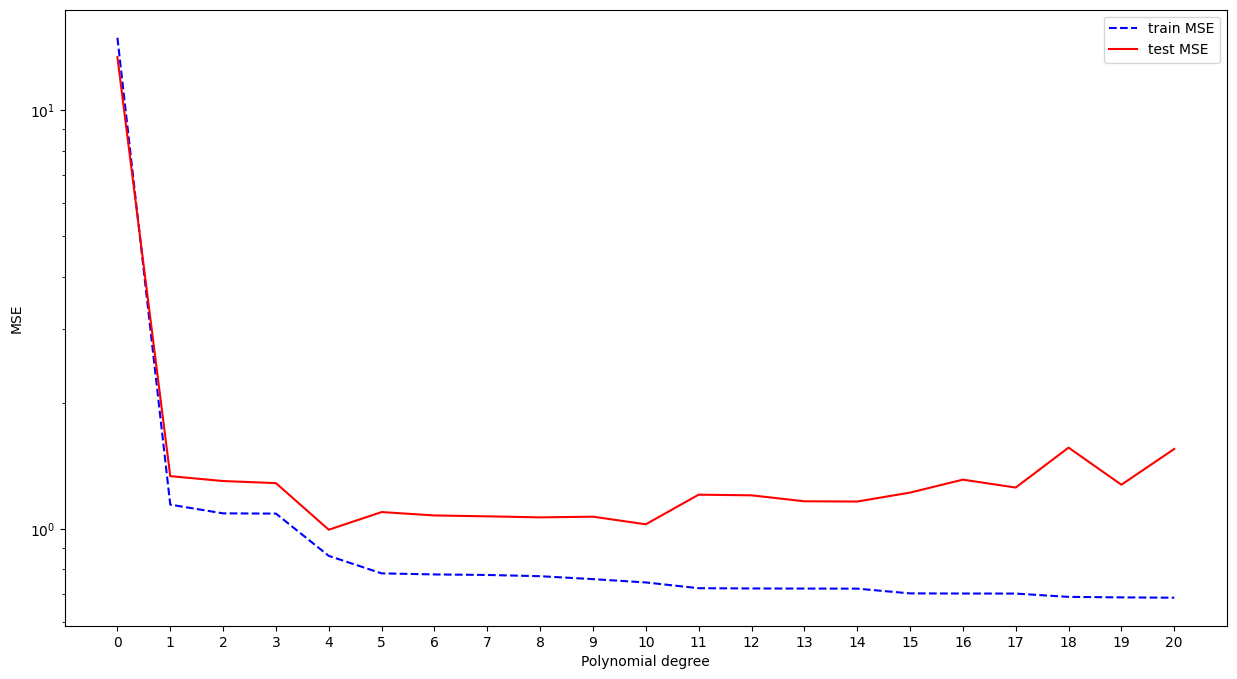

In [18]:
fig = plt.figure(2, clear=True)

plt.plot()

plt.semilogy(deg_range, MSEtrain, marker='None', linestyle='--', color='blue', label='train MSE')
plt.semilogy(deg_range, MSEtest, marker='None', linestyle='-', color='red', label='test MSE')

plt.xticks(deg_range)
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.show()

**Task**: For which polynomial degree is the **test MSE** score lowest? Store the polynomial degree in the variable `low_test_mse_deg`.

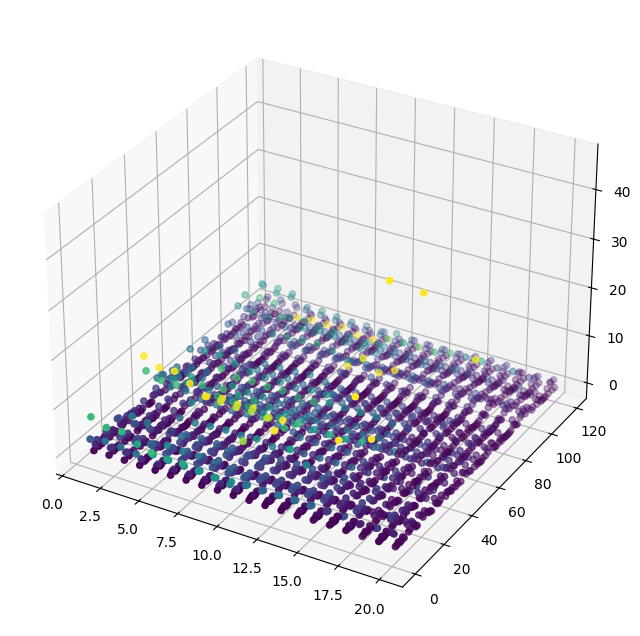

In [ ]:
low_test_mse_deg = np.argmin(MSEtest)
ax = plt.figure().add_subplot(projection='3d')

squared_err = lambda ys, fhatx: np.pow(ys - fhatx, 2)


err_per_point = []
errors = np.array([])
for i in deg_range:
    ys = np.arange(0, len(xtest))
    zs = squared_err(ytest, fhats[i](xtest))
    errors = np.concatenate((errors, zs))
    err_per_point.append(np.column_stack((ys, zs)))

for i in range(1, 21):
    ax.scatter3D(
        np.full(len(xtest), i), 
        err_per_point[i][:, 0], 
        err_per_point[i][:, 1], 
        c=err_per_point[i][:, 1],
        vmin=np.min(errors))

In [20]:
# This cell contains hidden tests. Don't remove it!